<a href="https://colab.research.google.com/github/Devisri2003/Principal-Component-Analysis/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Principal Component analysis**

##Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

##Loading Data

In [ ]:
dataset=pd.read_csv('/content/heart.csv')
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dataset.shape

(918, 12)

In [ ]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

It indicates that there is no null values.So no need to handle null values

In [ ]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#Removing Outliers using Z score
removing anything that has Z score > 3 formula

In [ ]:
dataset[dataset.RestingBP>(dataset.RestingBP.mean()+3*dataset.RestingBP.std())].shape

(7, 12)

In [ ]:
dataset1=dataset[dataset.RestingBP<=(dataset.RestingBP.mean()+3*dataset.RestingBP.std())]
dataset1.shape

(911, 12)

In [ ]:
dataset[dataset.Cholesterol>(dataset.Cholesterol.mean()+3*dataset.Cholesterol.std())].shape

(3, 12)

In [ ]:
dataset2=dataset1[dataset1.Cholesterol<=(dataset1.Cholesterol.mean()+3*dataset1.Cholesterol.std())]
dataset2.shape

(908, 12)

In [ ]:
dataset[dataset.FastingBS>(dataset.FastingBS.mean()+3*dataset.FastingBS.std())].shape

(0, 12)

In [ ]:
dataset[dataset.MaxHR>(dataset.MaxHR.mean()+3*dataset.MaxHR.std())].shape

(0, 12)

In [ ]:
dataset[dataset.Oldpeak>(dataset.Oldpeak.mean()+3*dataset.Oldpeak.std())].shape

(6, 12)

In [ ]:
dataset3=dataset2[dataset2.Oldpeak<=(dataset2.Oldpeak.mean()+3*dataset2.Oldpeak.std())]
dataset3.shape

(902, 12)

##Converting Categorical data to numerical data

In [ ]:
dataset3.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
dataset3.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
dataset3.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [ ]:
dataset3.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
dataset4=dataset3.copy()
dataset4.ExerciseAngina.replace({'N':0,'Y':1},inplace=True)
dataset4.ST_Slope.replace({'Up':1,'Flat':2,'Down':3},inplace=True)
dataset4.RestingECG.replace({'Normal':1,'ST':2,'LVH':3},inplace=True)
dataset4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,1,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,1,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,1,0


In [ ]:
dataset5=pd.get_dummies(dataset4,drop_first=True)
dataset5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,1,0,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,1,0,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,1,0,1,0,1,0


##Dividing Class lables from the dataset

In [ ]:
x=dataset5.drop("HeartDisease",axis='columns')
y=dataset5.HeartDisease

In [ ]:
x.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,1,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,1,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,1,1,0,1,0


In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

##Feature Scaling

In [ ]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

##Splitting dataset[training and testing data]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=30)

In [ ]:
x_train.shape

(721, 13)

In [ ]:
x_test.shape

(181, 13)

In [ ]:
y_train.shape

(721,)

In [ ]:
y_test.shape

(181,)

##Building a Model

###Random Forest Classifier

In [ ]:
x_train.shape

(721, 13)

In [ ]:
model_RFC=RandomForestClassifier()
model_RFC.fit(x_train,y_train)
model_RFC.score(x_test,y_test)

0.856353591160221

##Use PCA to reduce Dimensions

In [ ]:
x

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,1,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,1,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,1,132,0,1.2,2,1,0,0,1
914,68,144,193,1,1,141,0,3.4,2,1,0,0,0
915,57,130,131,0,1,115,1,1.2,2,1,0,0,0
916,57,130,236,0,3,174,0,0.0,2,0,1,0,0


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(x)
x_pca

array([[ 93.82465373, -29.40099458],
       [-15.58422331, -14.10909233],
       [ 83.29606634,  38.6867453 ],
       ...,
       [-67.57318721,  17.61319354],
       [ 40.70458237, -33.38750602],
       [-19.91368346, -37.29085722]])

In [92]:
x_train_pca,x_test_pca,y_train,y_test=train_test_split(pca_scaled,y,test_size=0.2,random_state=30)

In [93]:
x_train_pca.shape

(721, 2)

In [94]:
model_pca=RandomForestClassifier()
model_pca.fit(x_train_pca,y_train)
model_pca.score(x_test_pca,y_test)

0.7292817679558011

##Visualization

In [ ]:
x.keys()

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'Sex_M', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA'],
      dtype='object')

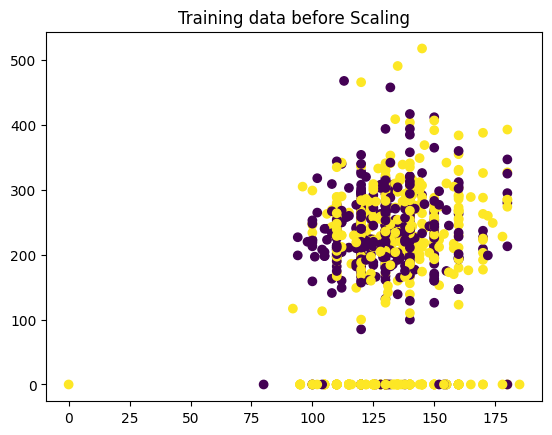

In [99]:
plt.scatter(x.RestingBP,x.Cholesterol,c=y)
plt.title('Training data[2 features] before Scaling')
plt.show()

In [76]:
df=pd.DataFrame(x_scaled)
df.columns=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR','ExerciseAngina', 'Oldpeak', 'ST_Slope', 'Sex_M', 'ChestPainType_ATA','ChestPainType_NAP', 'ChestPainType_TA']
df

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,-1.428963,0.460891,0.852380,-0.550879,-0.744611,1.381913,-0.820652,-0.846763,-1.045634,0.514856,2.067572,-0.535475,-0.229148
1,-0.475460,1.592573,-0.161329,-0.550879,-0.744611,0.752911,-0.820652,0.140799,0.620730,-1.942289,-0.483659,1.867502,-0.229148
2,-1.746797,-0.104950,0.796580,-0.550879,0.501473,-1.527222,-0.820652,-0.846763,-1.045634,0.514856,2.067572,-0.535475,-0.229148
3,-0.581404,0.347722,0.154874,-0.550879,-0.744611,-1.134095,1.218544,0.634579,0.620730,-1.942289,-0.483659,-0.535475,-0.229148
4,0.054264,1.026732,-0.021827,-0.550879,-0.744611,-0.583719,-0.820652,-0.846763,-1.045634,0.514856,-0.483659,1.867502,-0.229148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,-0.899239,-1.236632,0.619878,-0.550879,-0.744611,-0.190592,-0.820652,0.338311,0.620730,0.514856,-0.483659,-0.535475,4.363994
898,1.537491,0.687227,-0.040428,1.815279,-0.744611,0.163222,-0.820652,2.510946,0.620730,0.514856,-0.483659,-0.535475,-0.229148
899,0.372099,-0.104950,-0.617032,-0.550879,-0.744611,-0.858907,1.218544,0.338311,0.620730,0.514856,-0.483659,-0.535475,-0.229148
900,0.372099,-0.104950,0.359476,-0.550879,1.747556,1.460539,-0.820652,-0.846763,0.620730,-1.942289,2.067572,-0.535475,-0.229148


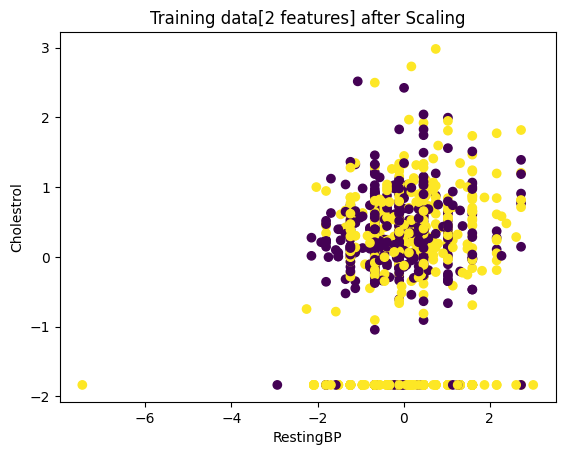

In [100]:
plt.scatter(df.RestingBP,df.Cholesterol,c=y)
plt.title('Training data[2 features] after Scaling')
plt.xlabel('RestingBP')
plt.ylabel('Cholestrol')
plt.show()

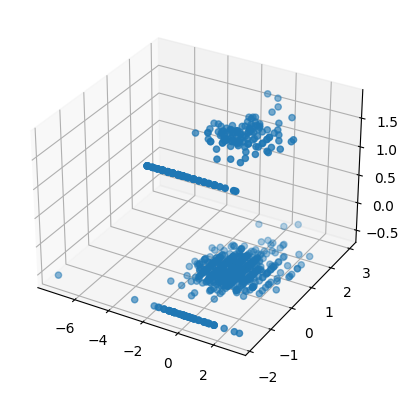

In [82]:
ax=plt.figure().add_subplot(projection='3d')
ax.scatter(df.RestingBP,df.Cholesterol,df.FastingBS)
plt.show()

In [83]:
x_pca

array([[ 93.82465373, -29.40099458],
       [-15.58422331, -14.10909233],
       [ 83.29606634,  38.6867453 ],
       ...,
       [-67.57318721,  17.61319354],
       [ 40.70458237, -33.38750602],
       [-19.91368346, -37.29085722]])

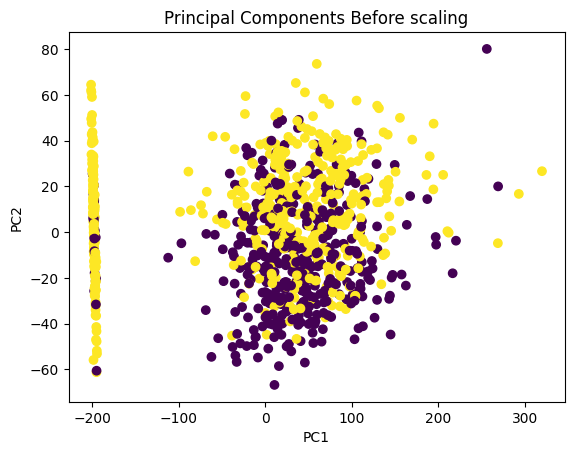

In [102]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.title("Principal Components Before scaling")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [90]:
scaler_1=StandardScaler()
pca_scaled=scaler.fit_transform(x_pca)
pca_scaled

array([[ 0.87093049, -1.16309712],
       [-0.14466108, -0.5581527 ],
       [ 0.77319853,  1.53043945],
       ...,
       [-0.62725038,  0.6967742 ],
       [ 0.37784165, -1.32080266],
       [-0.18484943, -1.47521841]])

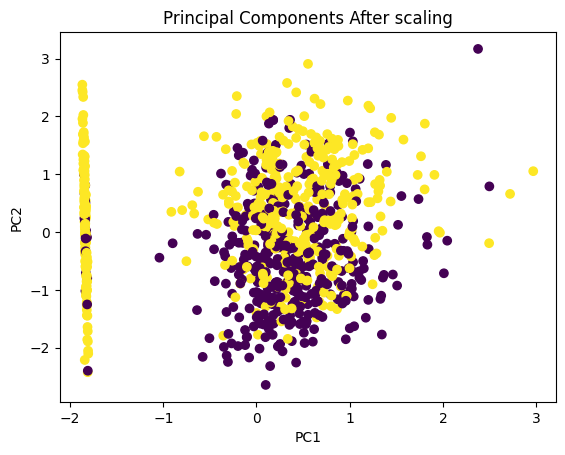

In [104]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=y)
plt.title("Principal Components After scaling")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()